# Data Visualization: Part 1
## Creating basic plots using Matplotlib library

## Scatter Plot

**What is a scatter plot?**

• A scatter plot is a set of points that represents the values obtained for two different variables plotted on a horizontal and vertical axes


**When to use scatter plots?**

• Scatter plots are used to convey the relationship between two numerical variables

• Scatter plots are sometimes called correlation plots because they show how two variables are correlated

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('F:\DS tut\datasets')

In [3]:
# importing data
cars_data = pd.read_csv('Toyota.csv', index_col=0, na_values=["??", "????"])

In [4]:
# removing missing values from the dataframe
cars_data.dropna(axis = 0, inplace = True)

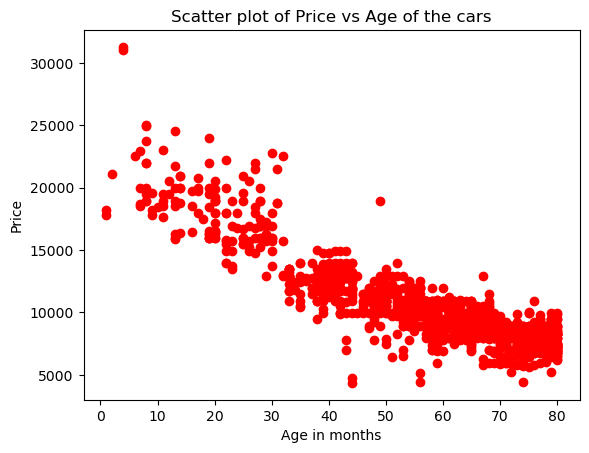

In [5]:
# creating scatter plot
plt.scatter(cars_data['Age'], cars_data['Price'], c='red')
plt.title('Scatter plot of Price vs Age of the cars')
plt.xlabel('Age in months')
plt.ylabel('Price')
#to display the plot
plt.show()

## Histogram
**What is a histogram?**

• It is a graphical representation of data using
bars of different heights

• Histogram groups numbers into ranges and
the height of each bar depicts the frequency
of each range or bin

**When to use histograms?**

• To represent the frequency distribution of
numerical variables

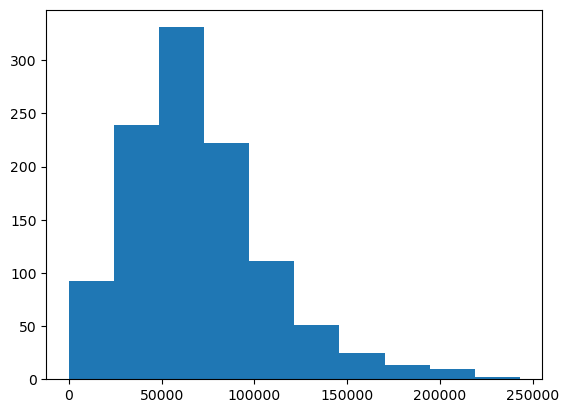

In [6]:
#histogram with default arguments (x)
plt.hist(cars_data['KM'])
plt.show()

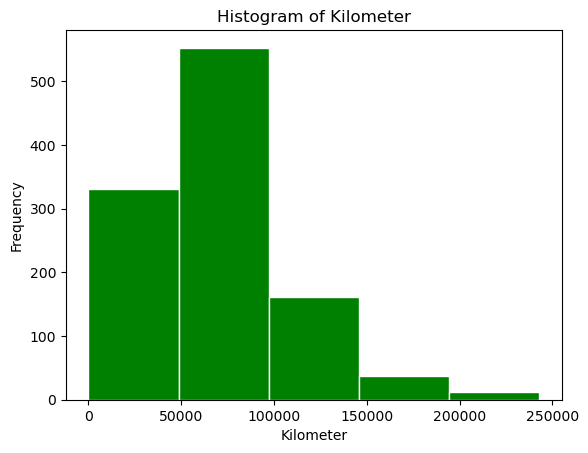

In [7]:
plt.hist(cars_data['KM'], color='green', edgecolor='white', bins=5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

 Frequency distribution of kilometre of the cars shows that most of the cars have travelled between 50000 – 100000 km and there are only few cars with more distance travelled

## Bar Plot

**What is a bar plot?**

• A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the counts that they represent

**When to use bar plot?**

• To represent the frequency distribution of categorical variables

• A bar diagram makes it easy to compare sets of data between different groups

In [8]:
#creating a bar plot
counts = [979, 120, 12] #height of the bars
fuelType = ('Petrol', 'Diesel', 'CNG')
index = np.arange(len(fuelType)) #x-coordinate

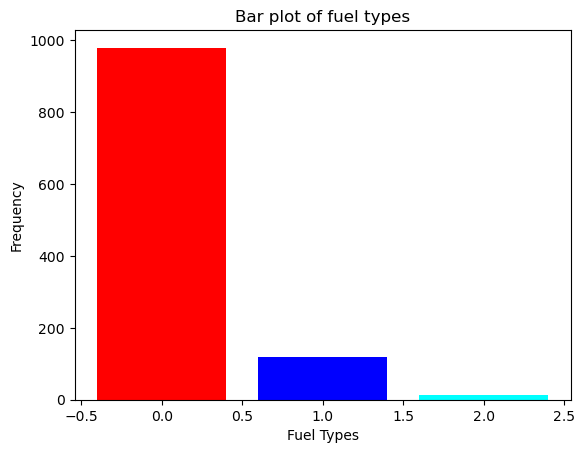

In [9]:
plt.bar(index, counts, color=['red', 'blue', 'cyan'])
plt.title('Bar plot of fuel types')
plt.xlabel('Fuel Types')
plt.ylabel('Frequency')
plt.show()

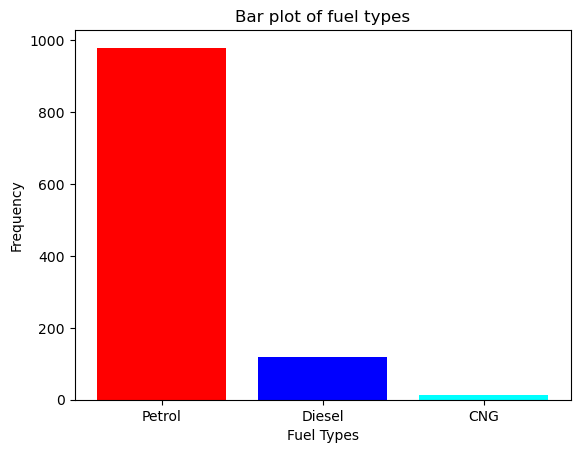

In [10]:
plt.bar(index, counts, color=['red', 'blue', 'cyan'])
plt.title('Bar plot of fuel types')
plt.xlabel('Fuel Types')
plt.ylabel('Frequency')
# index-location of the xticks, fuelType-label of the xticks 
plt.xticks(index, fuelType, rotation=0)
plt.show()

# Data Visualization: Part 2
## Creating basic plots using _Seaborn_ library

### Scatter Plot

**Scatter plot of _Price vs Age_ with default arguments**

In [11]:
# dark shade as background of our plot and also a grid will be visible
sns.set(style="darkgrid")

In [12]:
sns.regplot(x=cars_data['Age'], y=cars_data['Price'])

<AxesSubplot:xlabel='Age', ylabel='Price'>

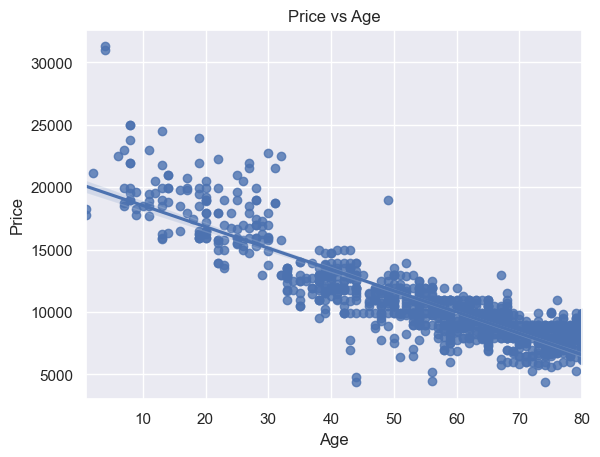

In [13]:
plt.title('Price vs Age')
plt.show()

o By default, fit_reg = True

o It estimates and plots a regression
model relating the x and y variables

In [14]:
sns.regplot(x=cars_data['Age'], y=cars_data['Price'], fit_reg=False)

<AxesSubplot:xlabel='Age', ylabel='Price'>

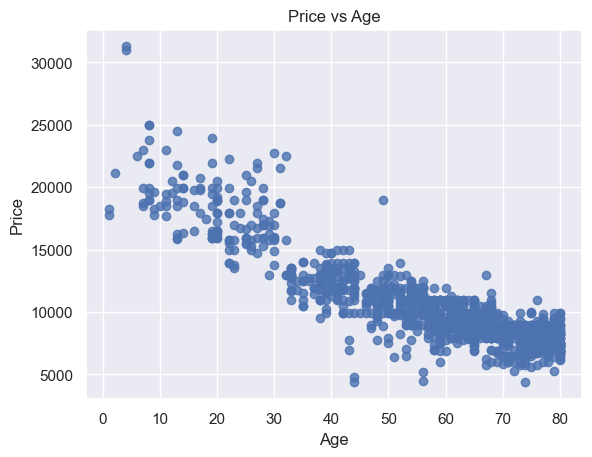

In [15]:
plt.title('Price vs Age')
plt.show()

#### Price vs Age by FuelType

Use _hue_ parameter, including another variable to show the fuel types categories with different colors.

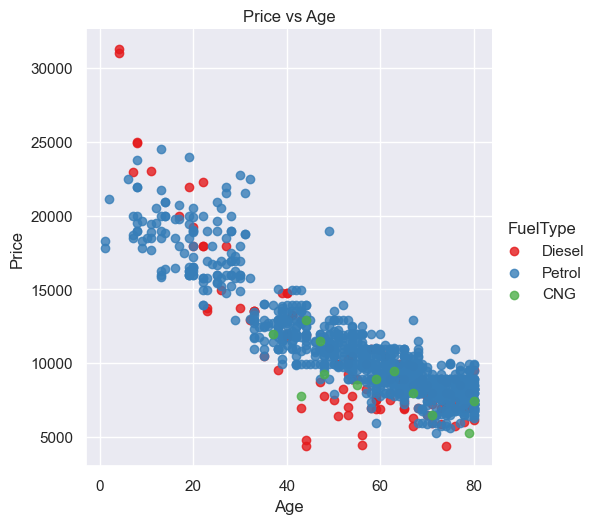

In [16]:
sns.lmplot(x='Age', y='Price', data=cars_data, fit_reg=False, hue='FuelType', legend=True, palette="Set1")
plt.title('Price vs Age')
plt.show()

**Scatter plot of Price vs Age by customizing the appearance of markers**

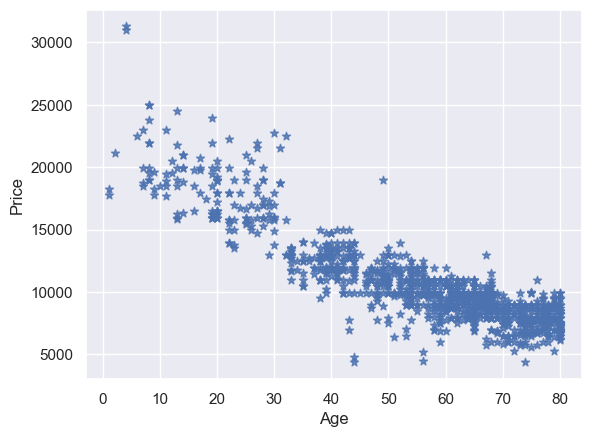

In [17]:
sns.regplot(x=cars_data['Age'], y=cars_data['Price'], marker="*", fit_reg=False)
plt.show()

### Histogram

**Histogram with default kernel density estimate**

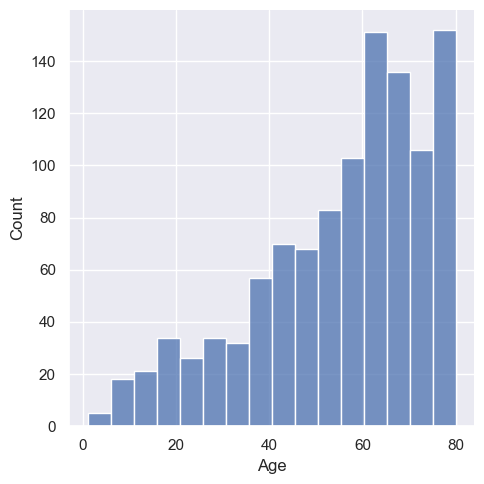

In [18]:
sns.displot(cars_data['Age'])
plt.show()

**Histogram without kernel density estimate**

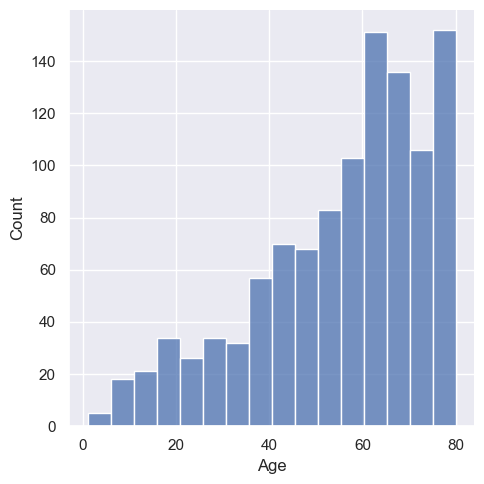

In [19]:
sns.displot(cars_data['Age'], kde=False)
plt.show()

**Histogram with fixed no. of bins**

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


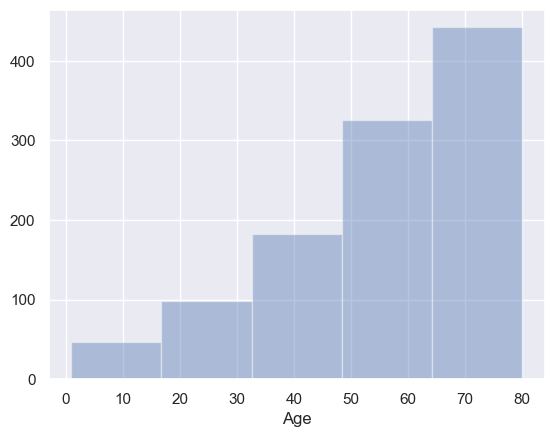

In [20]:
sns.distplot(cars_data['Age'], kde=False, bins=5)
plt.show()

### Bar Plot

**Frequency distribution of fuel type of the cars** 

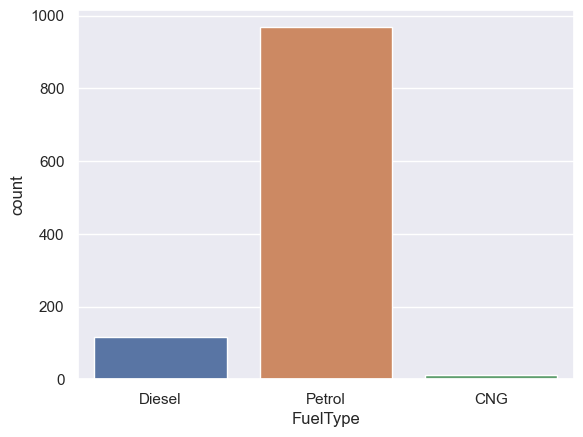

In [21]:
sns.countplot(x="FuelType", data=cars_data)
plt.show()

**Grouped Bar Plot**

**Gropued bar plot of _FuelType_ and _Automatic_**

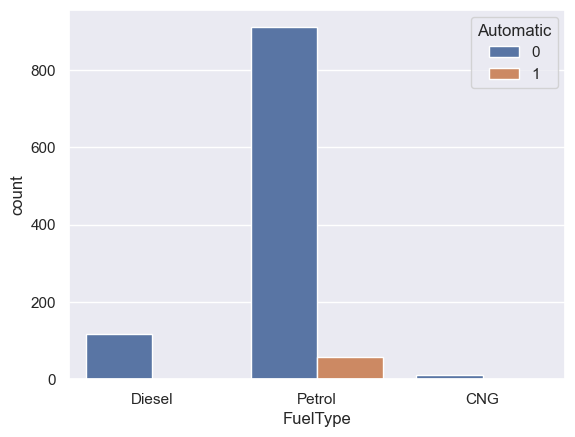

In [22]:
sns.countplot(x="FuelType", data=cars_data, hue="Automatic")
plt.show()

### Box and Whiskers Plot - numerical variable

**Box and whiskers plot of Price to visually interpret the five-number summary**

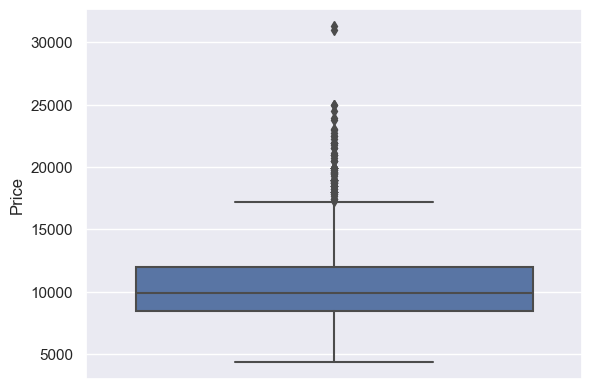

In [23]:
sns.boxplot(y=cars_data["Price"])
plt.show()

**5 numbers:** min, max, 1st quartile, 2nd quartile, 3rd quartile

**lowest line:** lower whisker, represents lowest value in the data excluding the outliers (any extreme value), min.value of the car (5000)

**highest line:** upper whisker, represents highest value in the data excluding the outliers, max.value of the car(15000-20000 -> ~160000)

**lower edge of the box (lowest horizontal line of the box):** 1st quartile, q1, 25% of the car's price is less than it(~8000)

**middle line(in the box):** 2nd quartile, q2, median, 50% of the data is less than 50000

**upper edge of the box (highest horizontal line of the box):** 3rd quartile, q3, 75% of the price of the car is less than ~12000

**points above the upper whiskers:** outliers, extreme values, these values are really more than q3 (~1.5 times in this case)

**points below the lower whiskers:** outliers, extremem values, these values are really less than q1

- look at the distibution of price variable, median values, lowest and highest values

- identify the extreme values

### Box and whiskers plot for numerical vs categorical variable

- _use this type of plot when you want to compare a numerical and categorical variable_

**Price of cars for various fuel types**

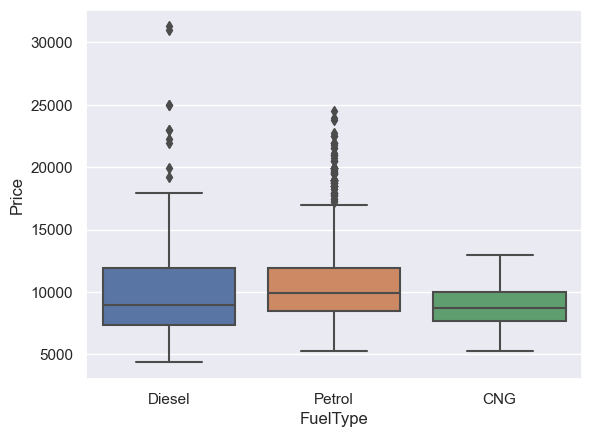

In [24]:
sns.boxplot(x=cars_data['FuelType'], y=cars_data['Price'])
plt.show()

### Grouped box and whiskers

**Price vs FuelType and Automatic**

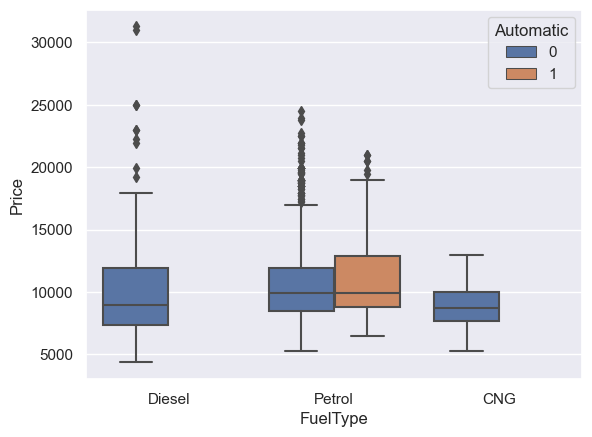

In [25]:
sns.boxplot(x=cars_data["FuelType"], y=cars_data["Price"], hue="Automatic", data=cars_data)
plt.show()

in the above plot, 

0 - manual gear box

1 - automatic gear box

there are not cars available which have automatic gear box and are having the fuel type as CNG or Diesel.



### Box whiskers plot and histogram on the same window

**1. Split the plotting window into 2 parts**

**2. Add create 2 plots**

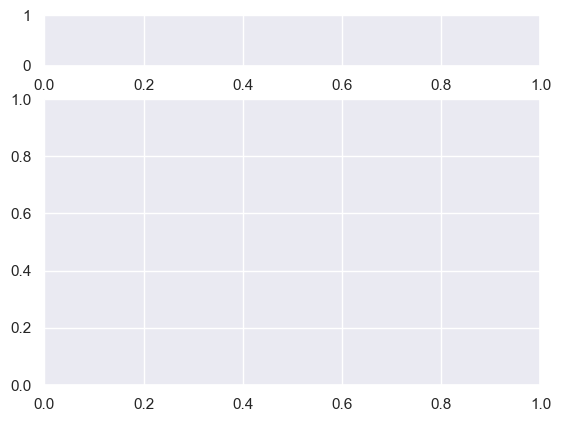

In [26]:
f, (ax_box, ax_hist)=plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
plt.show()

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


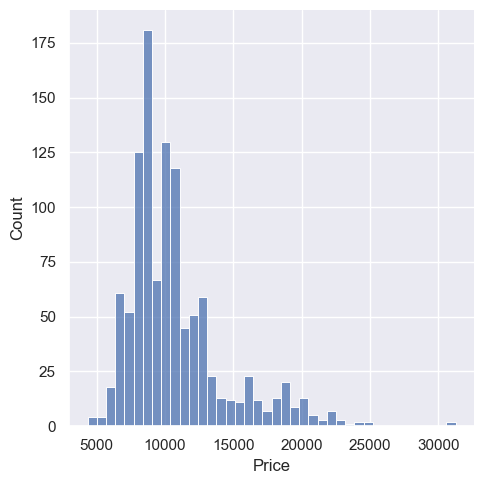

In [30]:
sns.boxplot(cars_data["Price"], ax=ax_box)
sns.displot(cars_data["Price"], ax=ax_hist, kde=False)
plt.show()

## Pairwise Plots

- It is used to plot pairwise relationships in a dataset

- Creates scatterplots for joint relationships and histograms for univariate distributions

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


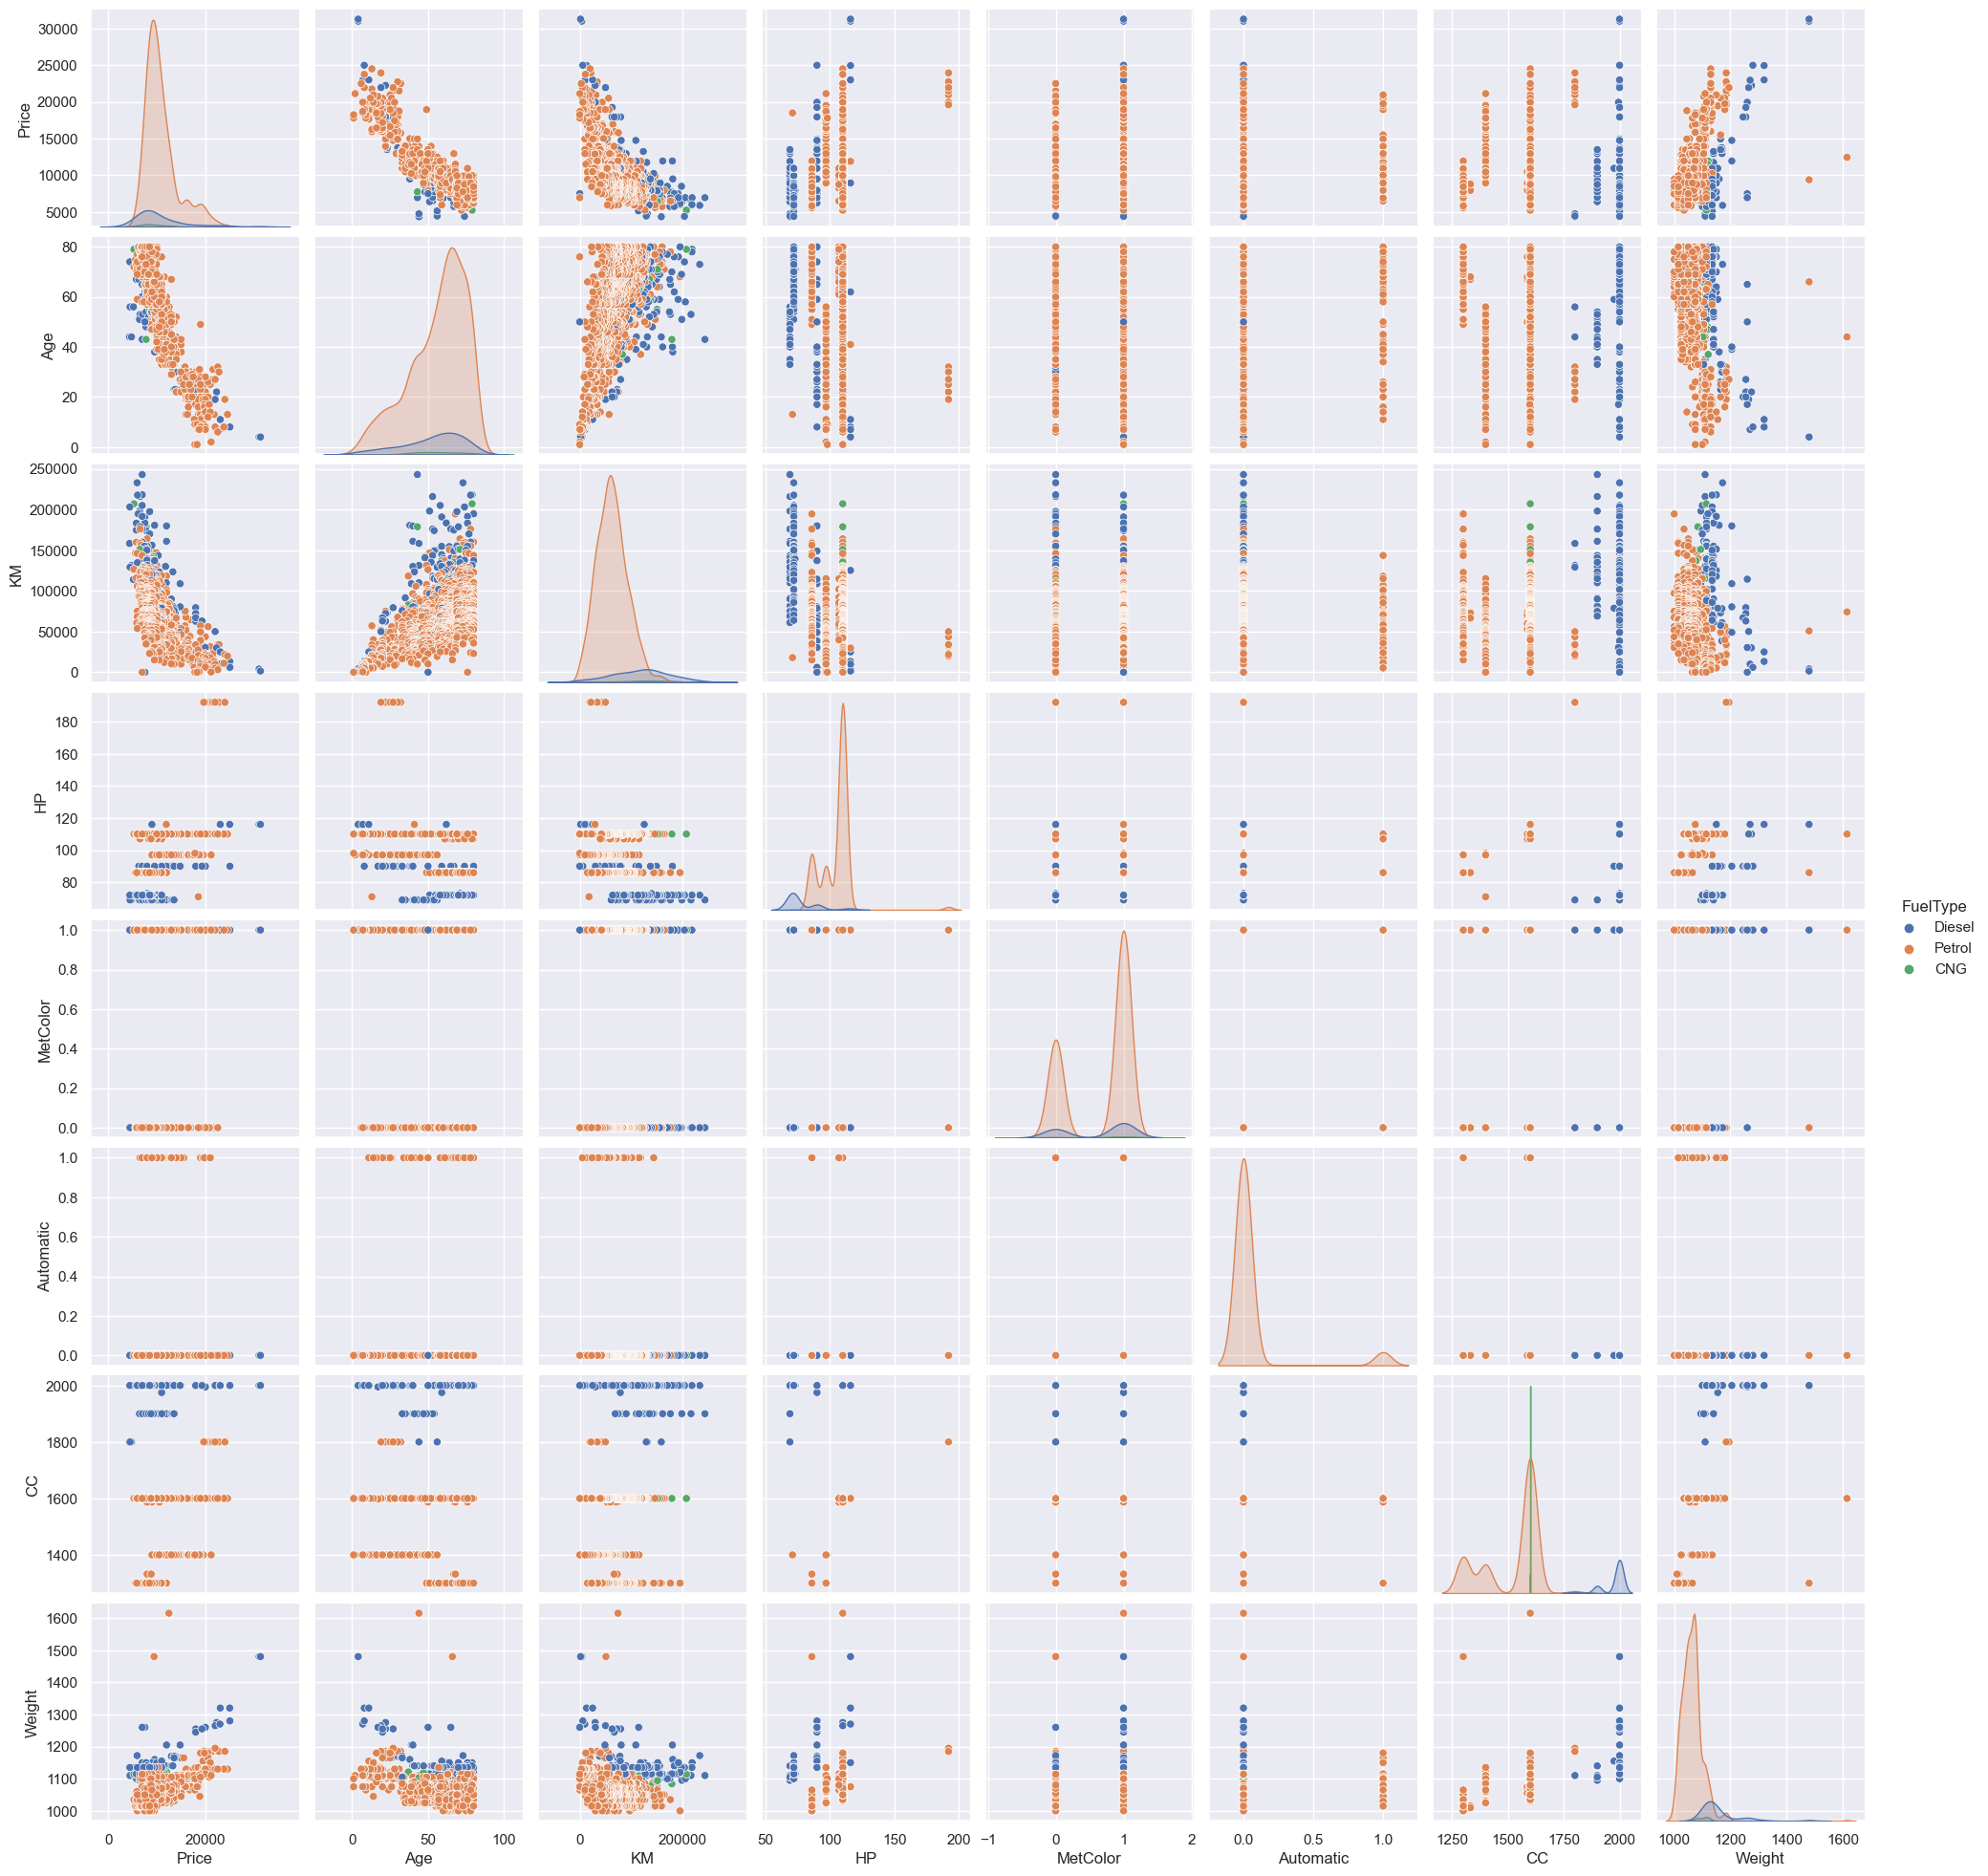

In [31]:
sns.pairplot(cars_data, kind="scatter", hue="FuelType")
plt.show()